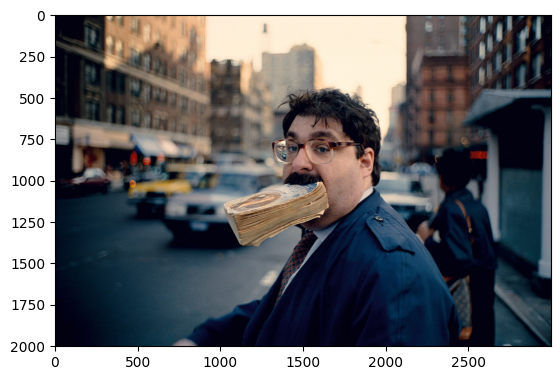

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('gambar2.jpg')

plt.imshow(img)
plt.show()


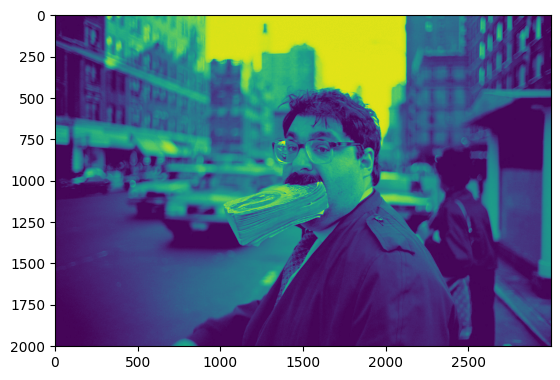

In [2]:
from PIL import Image

img = Image.open('gambar2.jpg')

img_gray = img.convert('L')

img_gray.save('gambar2.jpg')

img_gray.show()

img = Image.open('gambar2.jpg')

plt.imshow(img)
plt.show()

(2002, 3000, 3)


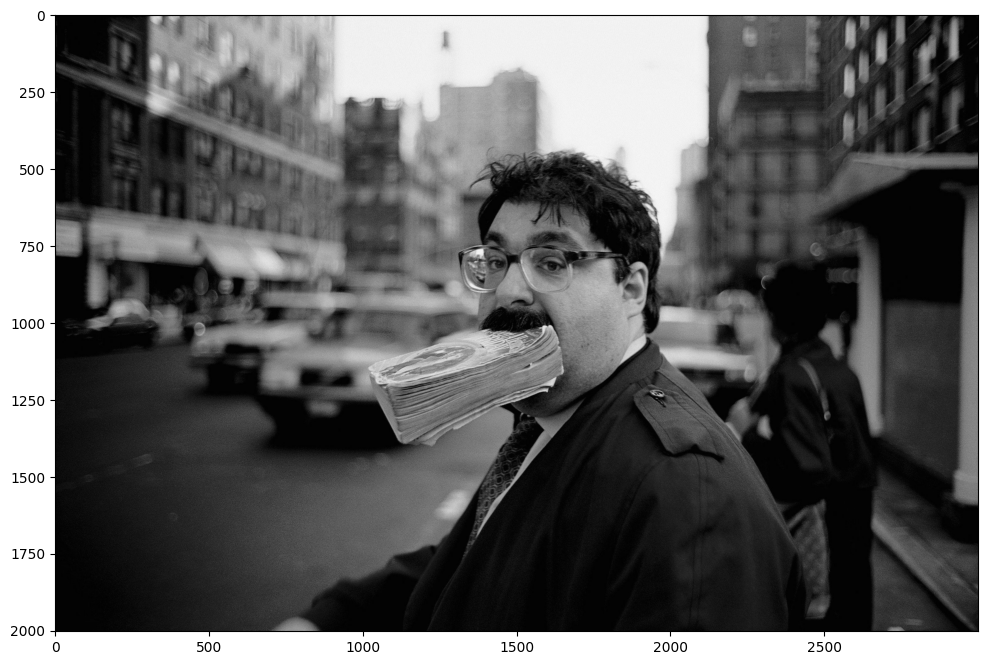

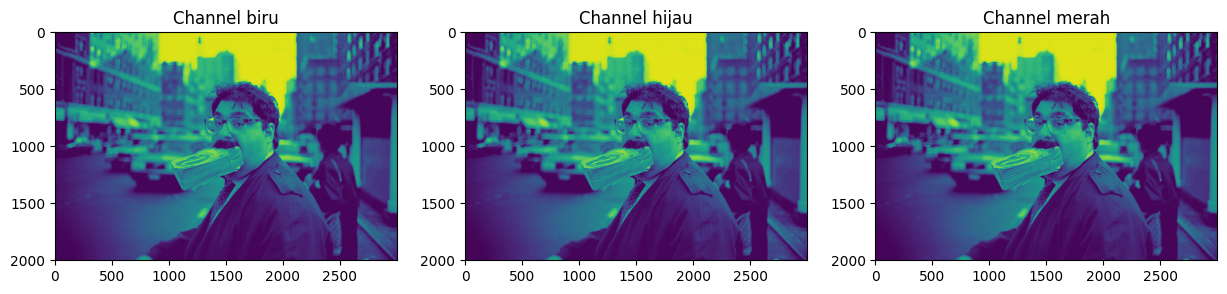

(2002, 50)
(2002, 50)
(2002, 50)


In [9]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.decomposition import PCA, IncrementalPCA
image_raw = cv2.imread("gambar2.jpg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
plt.imshow(image_raw)
# ===============
#Membagi ke dalam channel
blue,green,red = cv2.split(image_raw)
# Plot gambar
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Channel biru")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Channel hijau")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Channel merah")
plt.imshow(red)
plt.show()
# ===============
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df
# ===============
# Skala data

df_blue = blue/255
df_green = green/255
df_red = red/255
# Fit data
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

In [10]:
print(f"Channel biru : {sum(pca_b.explained_variance_ratio_)}")
print(f"Channel hijau: {sum(pca_g.explained_variance_ratio_)}")
print(f"Channel merah : {sum(pca_r.explained_variance_ratio_)}")

Channel biru : 0.9783590875569781
Channel hijau: 0.9783592819927993
Channel merah : 0.9783593280877882


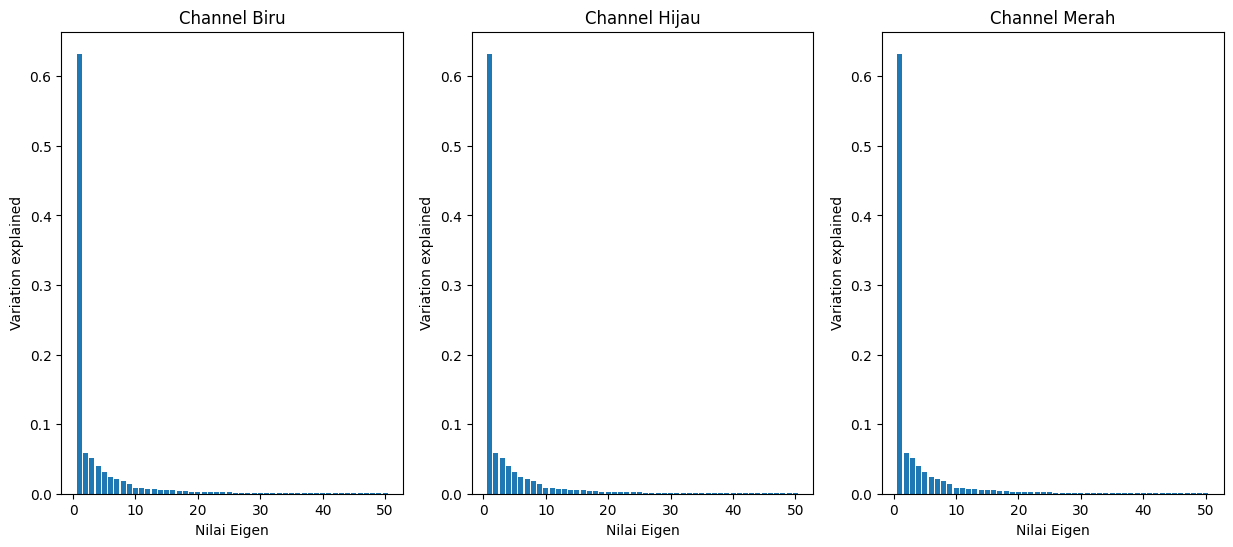

In [11]:
fig = plt.figure(figsize = (15, 6))
fig.add_subplot(131)
plt.title("Channel Biru")
plt.ylabel("Variation explained")
plt.xlabel("Nilai Eigen")
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Channel Hijau")
plt.ylabel("Variation explained")
plt.xlabel("Nilai Eigen")
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Channel Merah")
plt.ylabel("Variation explained")
plt.xlabel("Nilai Eigen")
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

(2002, 3000)
1.0
Number of components explaining 95% variance: 21


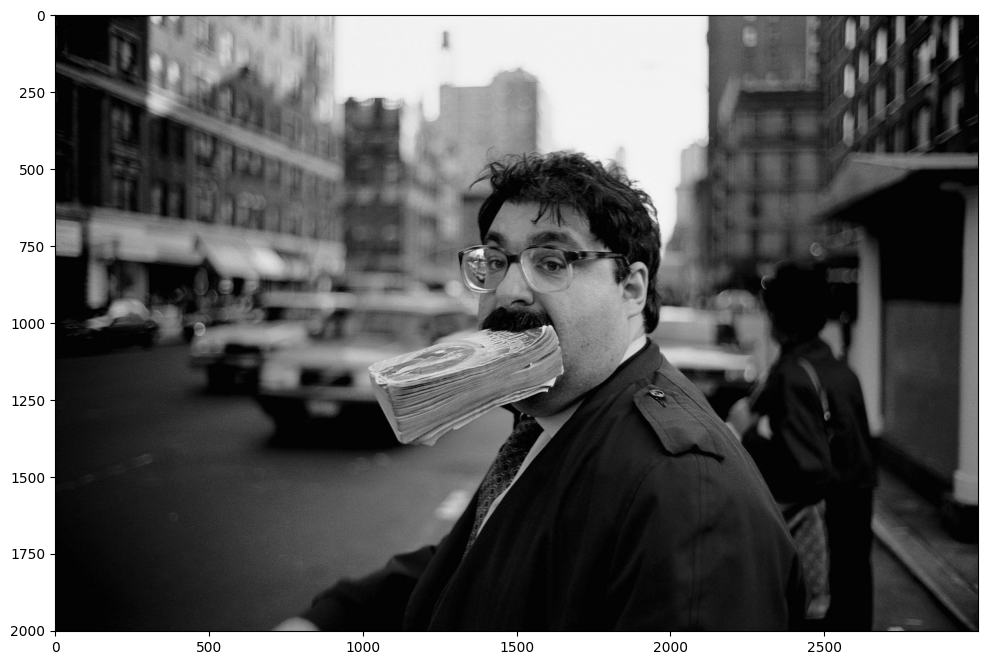

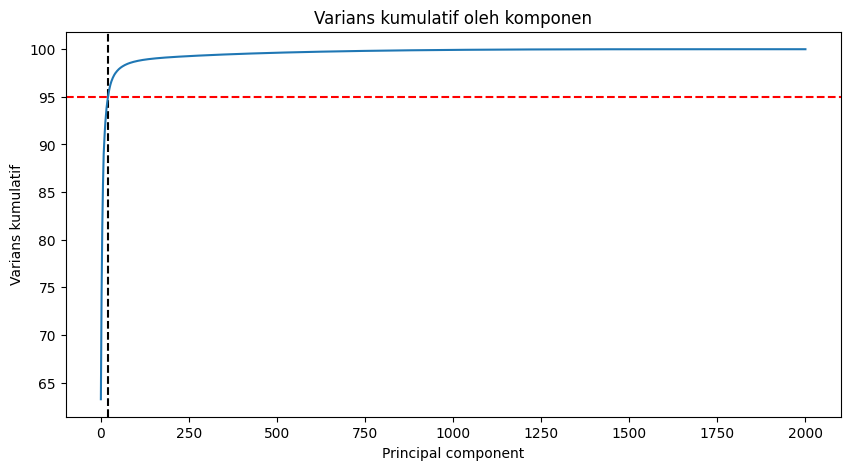

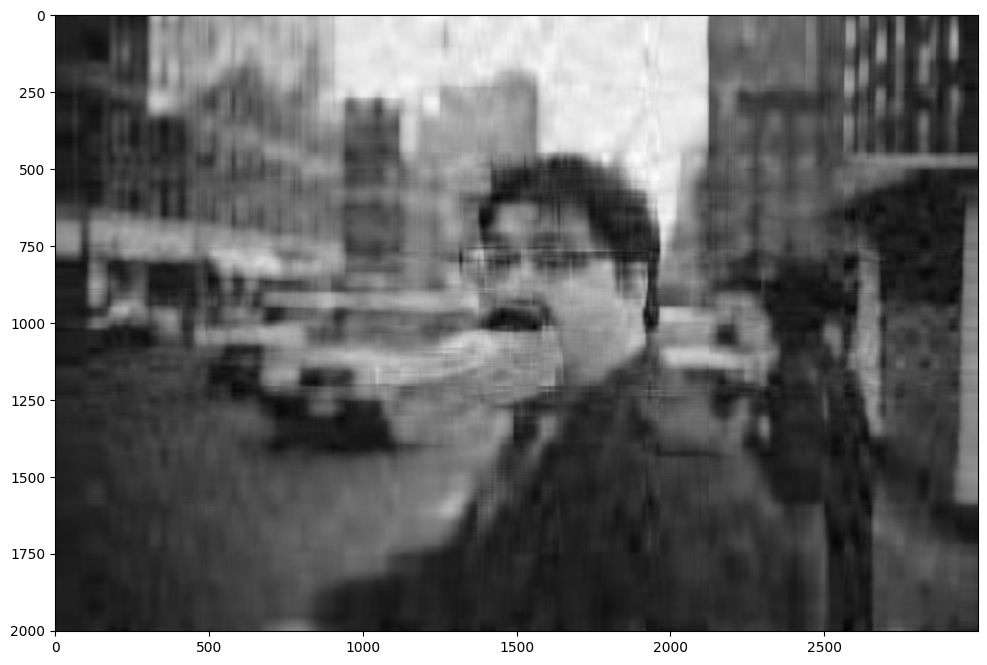

In [12]:
# ===============
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum/image_sum.max()
print(image_bw.max())
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)
# ===============
pca = PCA()
pca.fit(image_bw)
# mendapatkan varians kumulatif
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
# Jumlah PC dari variance explain 95%
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")
plt.figure(figsize=[10,5])
plt.title("Varians kumulatif oleh komponen")
plt.ylabel("Varians kumulatif")
plt.xlabel("Principal component")
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
# ===============
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
# Plot gambar terekonstruksi
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

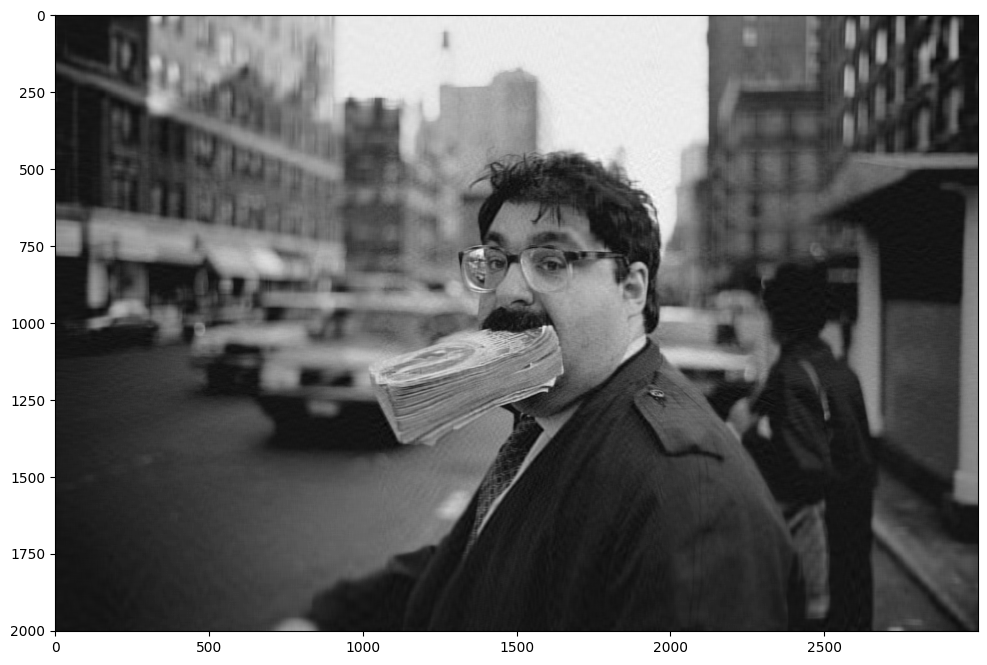

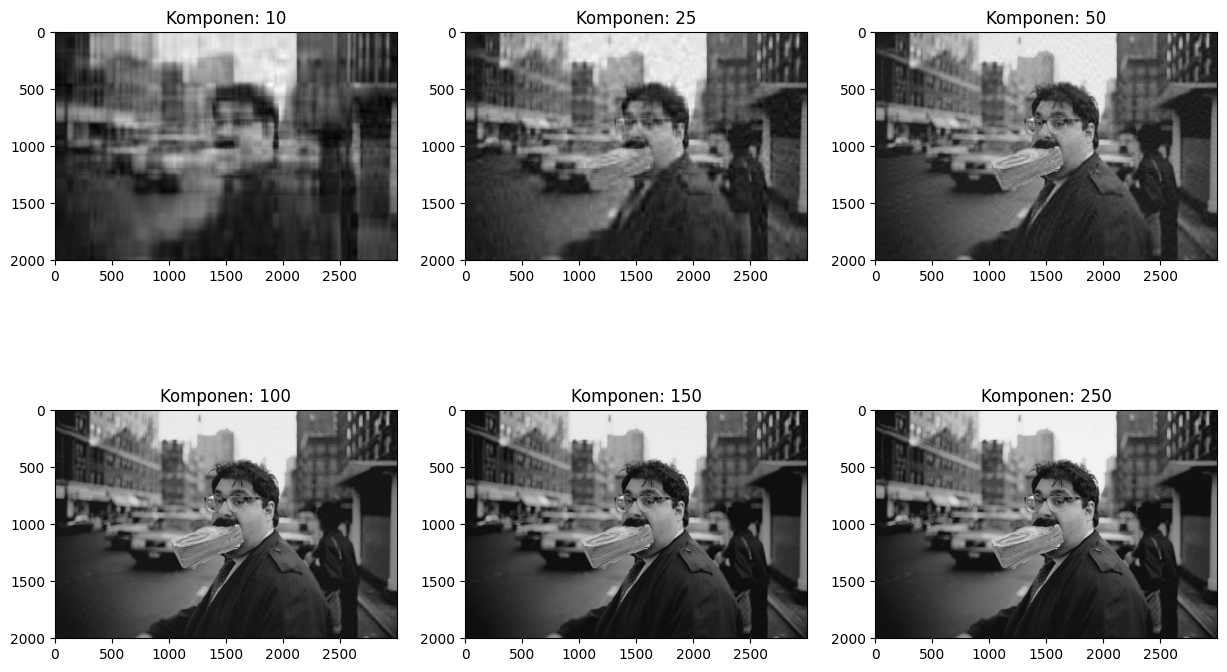

In [13]:

# ===============
# Fungsi untuk rekonstruksi dan plot gambar pada komponen
def plot_at_k(k):
  ipca = IncrementalPCA(n_components=k)
  image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
  plt.imshow(image_recon,cmap = plt.cm.gray)
k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)
# ===============
ks = [10, 25, 50, 100, 150, 250]
plt.figure(figsize=[15,9])
for i in range(6):
  plt.subplot(2,3,i+1)
  plot_at_k(ks[i])
  plt.title("Komponen: "+str(ks[i]))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()